In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats

np.random.seed(27);
torch.manual_seed(27);

In [2]:
DEVICE = 'cuda'

## Torus model

In [3]:
def model(v, center = np.array([0.6, 0.8])):
    a, b, c = v
    r = ((a-center[0])**2+(b-center[1])**2)**0.5  # Return radial distance from center
    x = np.array([a, r, c])
    return dict(x=x)

def noise(obs, v, noise = np.array([0.03, 0.005, 0.2])):
    x = obs['x']
    n = np.random.randn(*x.shape)*noise
    return dict(x = x + n)

In [4]:
v0 = np.array([0.57, 0.8, 1.0])
obs0 = model(v0)  # Using Asimov data

In [5]:
prior = swyft.Prior.from_uv(lambda u: u, 3)

In [6]:
simulator = swyft.Simulator(model, sim_shapes = dict(x=(3,)))
store = swyft.MemoryStore(3, simulator = simulator)

Creating new store.


In [17]:
marginals_1d = [0, 1, 2]
bound = None
for N in [5000, 5000, 5000, 5000, 10000]:
    task = swyft.Task(N, prior, store, simhook = noise, bound = bound)
    task.simulate()
    task.add(marginals_1d, device = DEVICE)
    task.train(marginals_1d)
    bound = task.truncate(marginals_1d, obs0)
    
marginals_2d = [(0, 1), (0, 2), (1, 2)]
task.add(marginals_2d, device = DEVICE)
task.train(marginals_2d)

Training: lr=0.001, Epoch=5, VL=2.141
Training: lr=0.0003, Epoch=2, VL=2.084
Training: lr=0.0001, Epoch=3, VL=2.034
Bounds: Truncating...
Bounds: ...done. New volue is V=0.1381
Store: Adding 573 new samples to simulator store.
Simulator: Running...
Simulator: ...done.
Training: lr=0.001, Epoch=5, VL=2.963
Training: lr=0.0003, Epoch=3, VL=2.913
Training: lr=0.0001, Epoch=2, VL=2.911
Bounds: Truncating...
Bounds: ...done. New volue is V=0.05584
Store: Adding 750 new samples to simulator store.
Simulator: Running...
Simulator: ...done.
Training: lr=0.001, Epoch=9, VL=2.941
Training: lr=0.0003, Epoch=3, VL=2.892
Training: lr=0.0001, Epoch=2, VL=2.915
Bounds: Truncating...
Bounds: ...done. New volue is V=0.02129
Store: Adding 261 new samples to simulator store.
Simulator: Running...
Simulator: ...done.
Training: lr=0.001, Epoch=6, VL=3.114
Training: lr=0.0003, Epoch=3, VL=3.089
Training: lr=0.0001, Epoch=3, VL=3.129
Bounds: Truncating...
Bounds: ...done. New volue is V=0.01885
Store: Adding

In [18]:
samples = task.sample(1000000, obs0)

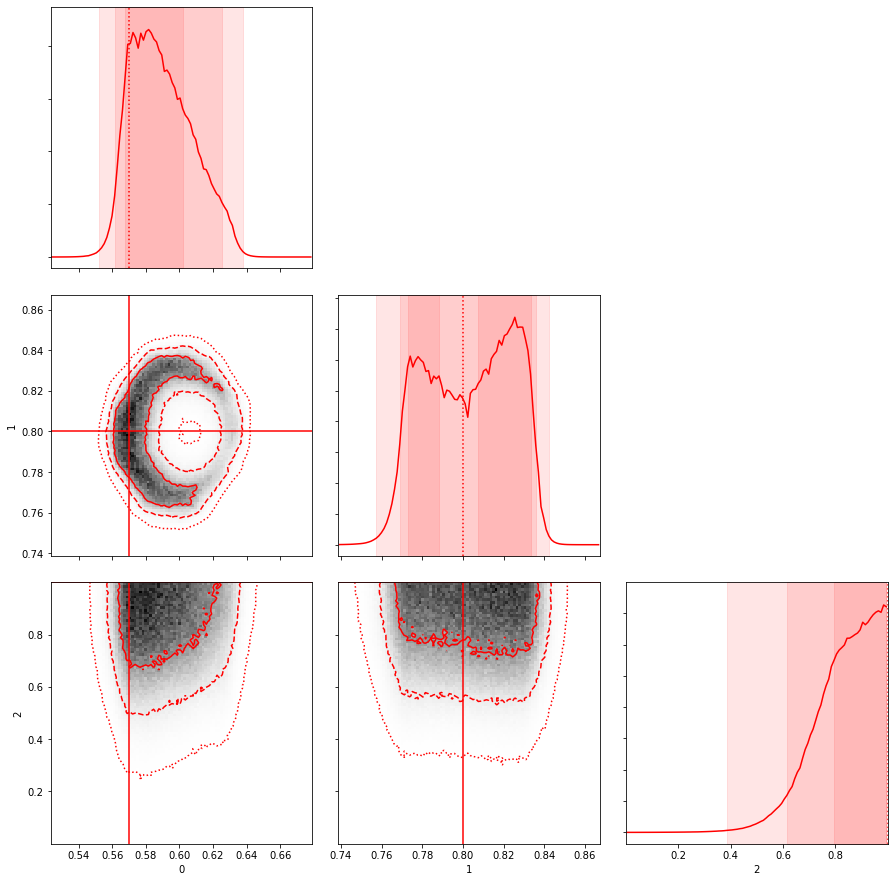

In [19]:
swyft.corner(samples, [0, 1, 2], color='r', figsize = (15,15), truth=v0)

In [20]:
len(store)

35360